# Section 4 - Avoiding data overinterpretation

## Example 4.2
**Application 4.2**: In LiP-MS, one can overinterpret the statistical significance of proteolytic cut sites (that reflect potential changes in protein structure); we need to correct the *p*-values to reflect this. 

* Run the following code cells in sequence and follow the instructions to test your knowledge at the end

### Step 0 - Load libraries

In [1]:
import pandas as pd
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

### Step 1 - Load the data

* We will be using a new dataset for this analysis that includes information about the protein fragments detected during a LiP-MS experiment

In [2]:
# "data10" is a pandas DataFrame object
data_path = "/home/jovyan/data-store/data/iplant/home/shared/NCEMS/BPS-training-2025/"
data10 = pd.read_csv(data_path + "Ecoli_LiPMS_data.csv", usecols = ["Accession", "PeptidePValue1"])

### Step 2 - Explore the data

In [3]:
# print a quick summary of "data10"
data10.info()

# print the first 10 rows of "data10"
data10.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41970 entries, 0 to 41969
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Accession       41970 non-null  object 
 1   PeptidePValue1  41970 non-null  float64
dtypes: float64(1), object(1)
memory usage: 655.9+ KB


,Accession,PeptidePValue1
0,P0A6Y8,7.740828
1,P0A6Y8,3.473137
2,P0A6Y8,14.137842
3,P0A6Y8,2.097467
4,P0A6Y8,1.451695
5,P0A6Y8,3.134283
6,P0A6Y8,3.354855
7,P0A6Y8,3.038093
8,P0A6Y8,-0.000000
9,P0A6Y8,7.027929


* Note that in the `pd.read_csv()` function call we have specified `usecols = ["Accession", "PeptidePValue1"]`, which causes only these two columns to be loaded; loading only the data you need can save memory and accelerate calculations
* We have a list of `Accession` codes alongside `PeptidePValue1` which represents the *p*-value
* Inspecting the *p*-values, we can see that they are not between 0 and 1 as we would expect; in this case, the input data set presents the *negative log base 10* of the *p*-values
* We will need to convert these -log10 values before carrying out the **false discovery rate** correction

### Step 3 - Run the analysis

* We are now ready to run our analysis (after converting the *p*-values from -log10)

,Accession,PeptidePValue1,PeptidePValue1_orig
0,P0A6Y8,7.740828,1.816236e-08
1,P0A6Y8,3.473137,3.364052e-04
2,P0A6Y8,14.137842,7.280451e-15
3,P0A6Y8,2.097467,7.989747e-03
4,P0A6Y8,1.451695,3.534310e-02
5,P0A6Y8,3.134283,7.340360e-04
6,P0A6Y8,3.354855,4.417176e-04
7,P0A6Y8,3.038093,9.160249e-04
8,P0A6Y8,-0.000000,1.000000e+00
9,P0A6Y8,7.027929,9.377163e-08


Using the uncorrected p-values, we would conclude 18656 peptides are significantly different between the treated & untreated samples
Using the corrected p-values, we would conclude 11821 peptides are significantly different between the treated & untreated samples


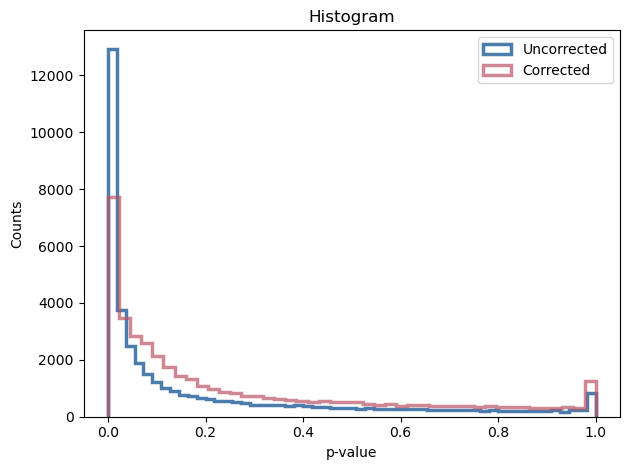

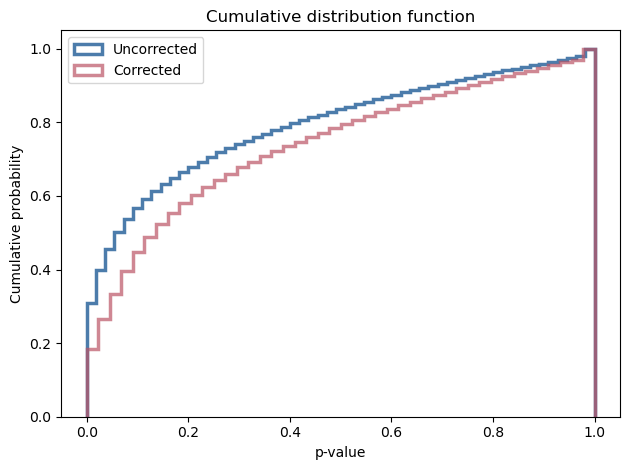

In [4]:
# define the significance level for our tests
alpha = 0.05

# convert p-values from -log10 and add these values as a new column
data10["PeptidePValue1_orig"] = 10 ** (-data10["PeptidePValue1"])
display(data10.head(10))

# apply the Benjamini-Hochberg procedure for FDR correction
_, pvals_corrected, _, _ = multipletests(data10['PeptidePValue1_orig'], alpha = alpha, method = 'fdr_bh')

# add corrected p-values as a new column
data10['PeptidePValue1_adjust'] = pvals_corrected

# compute the proportion of uncorrected p-values < alpha
N_uncorr_acc = (data10['PeptidePValue1_orig'] < alpha).sum()
N_corr_acc   = (data10['PeptidePValue1_adjust'] < alpha).sum()
print ("Using the uncorrected p-values, we would conclude", N_uncorr_acc, "peptides are significantly different between the treated & untreated samples")
print ("Using the corrected p-values, we would conclude", N_corr_acc, "peptides are significantly different between the treated & untreated samples")

# make a plot of the distribution of p-values before & after the FDR correction
plt.clf()
plt.title("Histogram")
plt.hist(data10["PeptidePValue1_orig"], color = "#004488", alpha = 0.7, label = "Uncorrected", histtype = "step", bins = "fd", linewidth=2.5) # here, alpha != significance level
plt.hist(data10["PeptidePValue1_adjust"], color = "#BB5566", alpha = 0.7, label = "Corrected", histtype = "step", bins = "fd", linewidth=2.5)
plt.xlabel("p-value")
plt.ylabel("Counts")
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

# make a plot of the cumulative distribution function of p-values before & after the FDR correction
plt.clf()
plt.title("Cumulative distribution function")
plt.hist(data10["PeptidePValue1_orig"], color = "#004488", alpha = 0.7, label = "Uncorrected", histtype = "step", bins = "fd", cumulative = True, density = True, linewidth=2.5) # here, alpha != significance level
plt.hist(data10["PeptidePValue1_adjust"], color = "#BB5566", alpha = 0.7, label = "Corrected", histtype = "step", bins = "fd", cumulative = True, density = True, linewidth=2.5)
plt.xlabel("p-value")
plt.ylabel("Cumulative probability")
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

### Step 4 - Interpret the results

* Use the QR code below to access a quiz question to test your knowledge about FDR correction

![](../images/section-4-example-2.png)

[Quiz Link](https://forms.gle/MN6jQaE6AjiJvEfb9)